# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the Haskell Indian Nations University campus in Lawrence, KS. The address in here,
`'Haskell Indian Nations University, Lawrence, KS, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'university'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [2]:
# Search for United Tribes Technical College
haskell_gdf = osm.features_from_address(
    'Haskell Indian Nations University, Lawrence, KS, United States',
    {'amenity': ['university']})
haskell_gdf

,,ways,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,boundary,ele,gnis:feature_id,heritage,...,nrhp:criteria,nrhp:inscription_date,nrhp:nhl,protection_title,ref:nrhp,type,wikidata,wikipedia,nodes,geometry
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,2330930,"[172603550, 174576051, 174576058, 171002778, 1...",Lawrence,2300,66046,Barker Avenue,university,protected_area,268,479134,2,...,(A),"July 4, 1961",yes,protected_site,66000342,multipolygon,Q845332,en:Haskell Indian Nations University,"[[[391518501, 1834666320, 1834666332, 12070968...","POLYGON ((-95.23831 38.93552, -95.23817 38.935..."


<Axes: >

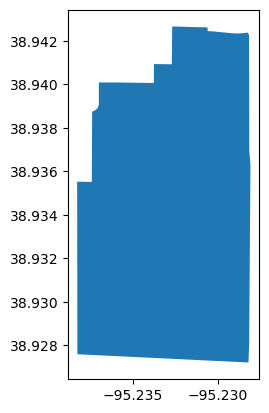

In [3]:
haskell_gdf.plot()

We have a map of the Haskell Campus!

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [5]:
# Plot haskell boundary
haskell_map = haskell_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Haskell Indian Nations Universty, Lawrence, KS",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=1200, frame_height=1200)

# Save the map as a file to put on the web
hv.save(haskell_map, 'haskell.html')

# Display the map
haskell_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [16]:
# Search JU Technical College
VBU_gdf = osm.features_from_address(
    'Vinoba Bhave University, Hazaribagh, Jharkhand, India',
    {'amenity': ['university']})
VBU_gdf

,,amenity,name,geometry,nodes,addr:city,name:etymology:wikidata,wikidata,wikipedia
element_type,osmid,,,,,,,,
node,9083418005,university,VINOBA BHAVE UNIVERCITY,POINT (85.37662 24.02217),NaN,NaN,NaN,NaN,NaN
way,524846511,university,Vinoba Bhave University,"POLYGON ((85.37735 24.02239, 85.37665 24.02274...","[5106871912, 5106871913, 5106871914, 510687191...",Hazaribagh,Q13021,Q7932713,en:Vinoba Bhave University


<Axes: >

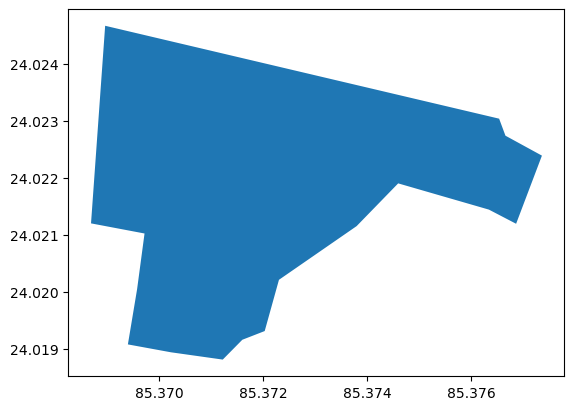

In [17]:
VBU_gdf.plot()

In [21]:
# Plot VBU boundary
VBU_map = VBU_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Vinoba Bhave Universty, Hazaribagh, Jharkhand",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=1200, frame_height=1200)

# Save the map as a file to put on the web
hv.save(VBU_map, 'VBU.html')

# Display the map
VBU_map

ValueError: The GeopandasInterface can only read dataframes which share a common geometry type